In [1]:
import numpy as np
import pandas as pd
import xlsxwriter

In [2]:
AMZN_data = pd.read_excel('Stock Prices.xlsx',sheet_name='AMZN')
AMZN_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
1,2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2,2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
3,2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
4,2017-01-07,801.770020,791.770020,798.000000,796.919983,3446100,796.919983


In [151]:
data = AMZN_data.iloc[:20]
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
1,2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2,2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
3,2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
4,2017-01-07,801.770020,791.770020,798.000000,796.919983,3446100,796.919983
5,2017-01-08,798.000000,789.539978,796.599976,795.900024,2558400,795.900024
6,2017-01-09,799.500000,789.510010,793.659973,799.020020,2992800,799.020020
7,2017-01-10,814.130005,799.500000,800.309998,813.640015,4873900,813.640015
8,2017-01-11,821.650024,811.400024,814.320007,817.140015,3791900,817.140015
9,2017-01-12,816.000000,803.440002,815.700012,809.719971,3670500,809.719971


In [3]:
# Initialize the excel output file
excel_file_path = './Output_Stock_Prices_Chart.xlsx'

workbook = xlsxwriter.Workbook(excel_file_path)

AMZN_worksheet = workbook.add_worksheet()

date_format = workbook.add_format({'num_format': 'dd/mm/yy'})

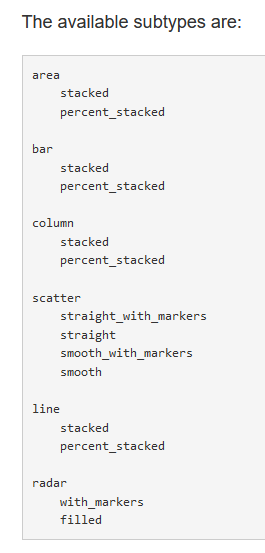

In [4]:
j = 1
for i,col_name in enumerate(AMZN_data.columns):
    AMZN_worksheet.write(0,i,col_name)
    if(i==0):
        AMZN_worksheet.write_column(1,i,AMZN_data[col_name],date_format)
    else:
        AMZN_worksheet.write_column(1, i, AMZN_data[col_name])

        chart=workbook.add_chart({'type':'scatter','subtype':'straight'})
        col_letter=xlsxwriter.utility.xl_col_to_name(i)


        chart.add_series({'categories':'=Sheet1!$A$2:$A$'+str(len(AMZN_data['Close']+1)),
                          'values':'=Sheet1!$'+col_letter+'$2:$'+col_letter+'$755',
                          'name': col_name})

        peak=np.max(AMZN_data[col_name])
        peak_index=np.argmax(AMZN_data[col_name])

        chart.add_series({'categories':'=Sheet1!$A$'+str(2+peak_index),
                          'values':'=Sheet1!$'+col_letter+'$'+str(2+peak_index),
                          'name': 'Peak',
                          'marker':{'type':'circle'}})

        chart.set_x_axis({'name':'Date'})
        chart.set_title({'name': col_name})
        chart.set_y_axis({'name':col_name,'min':0,'max':1.2*peak})

        AMZN_worksheet.insert_chart('I'+str(j),chart)
        j += 16

In [5]:
workbook.close()

In [286]:
# Initialize the excel output file
excel_file_path = './Output_Stock_Prices_Chart.xlsx'

workbook = xlsxwriter.Workbook(excel_file_path)

AMZN_worksheet = workbook.add_worksheet()

date_format = workbook.add_format({'num_format': 'dd/mm/yy'})

In [287]:
AMZN_worksheet.write(0,0,'Date')
AMZN_worksheet.write_column(1, 0, data['Date'],date_format)
AMZN_worksheet.write(0,1,'High')
AMZN_worksheet.write_column(1, 1, data['High'])
AMZN_worksheet.write(0,2,'Low')
AMZN_worksheet.write_column(1, 2, data['Low'])

chart = workbook.add_chart({'type':'line','subtype':'stacked'})
col_letter = xlsxwriter.utility.xl_col_to_name(1)


chart.add_series({
    'categories':'=Sheet1!$A$2:$A$'+str(len(data['High'])+1),
    'values':'=Sheet1!$'+col_letter+'$2:$'+col_letter+'$'+str(len(data['High'])+1),
    'name': AMZN_data.columns[1],
    'line': {'color': '#4F008C', 'width': 2.75},
    #'marker': {'type': 'circle', 'size' : 3, 'border': {'color': '#4F008C'},  'fill' : {'color' : '#4F008C'}},
    'smooth': True,
    'data_labels': {
        'value': True, 'position': 'above', 'num_format': '#,##0.0',
        'font': {'name': 'Calibri', 'size': 9, 'color': '#4F008C'},
        #'border': {'color': '#4F008C'}, 'fill':   {'color': 'white'}
                    }
    
})

chart.add_series({
    'categories':'=Sheet1!$A$2:$A$'+str(len(data['High'])+1),
    'values':'=Sheet1!$C$2:$C$'+str(len(data['High'])+1),
    'name': AMZN_data.columns[2],
    'line': {'color': '#00B050', 'width': 2.75, 'dash_type': 'dash'},
    'smooth': True    
                })


chart.set_x_axis({ 'num_font': {'name': 'Calibri', 'size': 12, 'color': '#4F008C'}, 
                  'major_gridlines': {'visible': False },
                  'minor_gridlines': {'visible': False } })

# chart.set_y_axis({'name':data.columns[1], 'min': 720, 'max': 880 ,
#                   'name_font': {'size': 9, 'bold': False},
#                  'num_font': {'name': 'Arial', 'size': 7, 'color': 'red'},
#                  })

chart.set_y_axis({'visible': False,
                 'major_gridlines': {'visible': False },
                 'minor_gridlines': {'visible': False } })
chart.set_legend({'none': True})
chart.set_title({'name': data.columns[1], 'name_font': {'size': 18, 'bold': True}})

AMZN_worksheet.insert_chart('I'+str(1),chart, {'x_scale': 1.4, 'y_scale': 1})

In [288]:
workbook.close()

# Cell Utility Functions

In [25]:
from xlsxwriter.utility import xl_rowcol_to_cell
from xlsxwriter.utility import xl_cell_to_rowcol
from xlsxwriter.utility import xl_col_to_name
from xlsxwriter.utility import xl_range
from xlsxwriter.utility import xl_range_abs

## xl_rowcol_to_cell

In [19]:
cell = xl_rowcol_to_cell(0, 0)
cell

'A1'

## xl_cell_to_rowcol

In [20]:
(row, col) = xl_cell_to_rowcol('B2')
print(row,'-',col)

1 - 1


## xl_col_to_name (complete column)

In [22]:
column1 = xl_col_to_name(0)     # Non Absolute
column2 = xl_col_to_name(0, False)  # Non Absolute
column3 = xl_col_to_name(1, True)   # Absulute Absolute
print(column1)
print(column2)
print(column3)

A
A
$B


## xl_range

In [23]:
cell_range = xl_range(0, 0, 9, 0)
cell_range

'A1:A10'

## xl_range_abs

In [26]:
cell_range = xl_range_abs(0, 0, 9, 0)
cell_range

'$A$1:$A$10'